# HIV Model
## By: Mary Fung

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [24]:
def make_system(gamma, mu, tau, beta, rho, alpha, sigma, delta, pi):
    """Make a system object for the SIR model.
    
    returns: System object
    """
    init = State(R=1000, L=0, E=0, V=4*10**(-7))
    #init /= np.sum(init)

    t0 = 0
    t_end = 120
    dt = .05

    return System(init=init, t0=t0, t_end=t_end, dt=dt,
                  gamma=gamma, mu=mu, tau=tau, beta=beta, rho=rho,
                  alpha=alpha, sigma=sigma, delta=delta, pi=pi)

In [25]:
def plot_results(R,L,E,V):
    """Plot the results of a SIR model.
    """
    
    plot(R, '--', label='Uninfected CD4 Lymphocytes')
    plot(L, '-', label='Latently Infected Cells')
    plot(E, ':', label='Actively Infected Cells')
    plot(V, '-.', label='Free Virons')
    decorate(xlabel='Days from infection',
             ylabel='Total number of cells')

In [26]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    ts = linrange(0, t_end, dt)
    
    for t in ts:
        frame.row[t+dt] = update_func(frame.row[t], t, system)
    
    return frame

In [27]:
def update_func(state, t, system):
    """Update the model.
    
    state: State
    t: time
    system: System object
    
    returns: State
    """
    unpack(system)
    
    r, l, e, v = state

    dRdt = (gamma * tau) - (mu * r) - (beta * r * v)
    dLdt = (rho * beta * r * v) - (mu * l) - (alpha * l)
    dEdt = ((1 - rho) * beta * r * v) + (alpha * l) - (delta * e)
    dVdt = (pi * e) - (sigma * v)
    
    r += dRdt * dt
    l += dLdt * dt
    e += dEdt * dt
    v += dVdt * dt
    
    return State(R=r, L=l, E=e, V=v)

In [28]:
#Create initial system values as listed in the chart in the paper.
system = make_system(1.36, 1.36*10**(-3), 0.2, 0.00027, 0.1, 3.6*10**(-2),
                     2, 0.33, 100)

,values
init,R 1.000000e+03 L 0.000000e+00 E 0.000...
t0,0
t_end,120
dt,0.05
gamma,1.36
mu,0.00136
tau,0.2
beta,0.00027
rho,0.1
alpha,0.036


In [29]:
results = run_simulation(system, update_func)
results.head()

,R,L,E,V
0.00,1000.000000,0.000000e+00,0.000000e+00,4.000000e-07
0.05,999.945600,5.400000e-10,4.860000e-09,3.600000e-07
0.10,999.891204,1.024965e-09,9.154544e-09,3.483000e-07
0.15,999.836811,1.493204e-09,1.323672e-08,3.592427e-07
0.20,999.782422,1.975313e-09,1.738509e-08,3.895021e-07


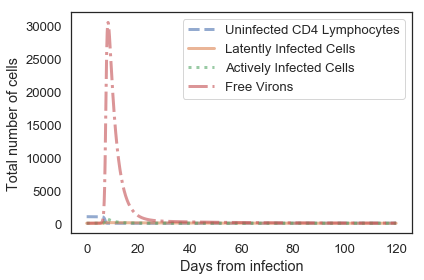

In [30]:
plot_results(results.R, results.L, results.E, results.V)